In [1]:
import sys


sys.path.append('../common_code')

# # for reading datafiles 
import pandas as pd
# import script that has many standard functions:
from PostProcessingScripts import * 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


obtain index of the SFRD models that we want to highlight


/var/folders/lc/vg4hc2nn2pn05y4lw3h5wmpm0000gn/T/ipykernel_59381/3290726233.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:

# GWTC-1, GWTC-2.1, GWTC-3
BBH_list = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', 'GW170809', 'GW170814', 'GW170818', 'GW170823', 'GW190403_051519', 'GW190408_181802', 'GW190412', 'GW190413_052954', 'GW190413_134308', 'GW190421_213856', 'GW190426_190642', 'GW190503_185404', 'GW190512_180714', 'GW190513_205428', 'GW190514_065416', 'GW190517_055101', 'GW190519_153544', 'GW190521', 'GW190521_074359', 'GW190527_092055', 'GW190602_175927', 'GW190620_030421', 'GW190630_185205', 'GW190701_203306', 'GW190706_222641', 'GW190707_093326', 'GW190708_232457', 'GW190719_215514', 'GW190720_000836', 'GW190725_174728', 'GW190727_060333', 'GW190728_064510', 'GW190731_140936', 'GW190803_022701', 'GW190805_211137', 'GW190814', 'GW190828_063405', 'GW190828_065509', 'GW190910_112807', 'GW190915_235702', 'GW190916_200658', 'GW190917_114630', 'GW190924_021846', 'GW190925_232845', 'GW190926_050336', 'GW190929_012149', 'GW190930_133541', 'GW191103_012549', 'GW191105_143521', 'GW191109_010717', 'GW191113_071753', 'GW191126_115259', 'GW191127_050227', 'GW191129_134029', 'GW191204_110529', 'GW191204_171526', 'GW191215_223052', 'GW191216_213338', 'GW191222_033537', 'GW191230_180458', 'GW200112_155838', 'GW200128_022011', 'GW200129_065458', 'GW200202_154313', 'GW200208_130117', 'GW200208_222617', 'GW200209_085452', 'GW200210_092255', 'GW200216_220804', 'GW200219_094415', 'GW200220_061928', 'GW200220_124850', 'GW200224_222234', 'GW200225_060421', 'GW200302_015811', 'GW200306_093714', 'GW200308_173609', 'GW200311_115853', 'GW200316_215756', 'GW200322_091133']

BNS_list = ['GW170817', 'GW190425']

BHNS_list = ['GW190426_152155', 'GW190917_114630', 'GW200105', 'GW200115']


In [3]:
import datetime 


fmt = 'GW%y%m%d'


GW_ = ['GW190521']


# _%H%M%S
trystr = '190521'



strptime_BBHs = []
for GW_ in BBH_list:
    
    d2 = datetime.datetime.strptime(GW_.split('_')[0], fmt)
    d2 = d2.year + d2.month/12.
    strptime_BBHs.append(d2)
       
strptime_BHNSs = []
for GW_ in BHNS_list:
    
    d2 = datetime.datetime.strptime(GW_.split('_')[0], fmt)
    d2 = d2.year + d2.month/12.
    strptime_BHNSs.append(d2)    


strptime_BNSs = []
for GW_ in BNS_list:
    
    d2 = datetime.datetime.strptime(GW_.split('_')[0], fmt)
    d2 = d2.year + d2.month/12.
    strptime_BNSs.append(d2)  
    
    
    
    
today = datetime.datetime.now()
today = today.year + today.month/12.
print(today)
import matplotlib.dates as mdates




2023.25


In [4]:
def cumhist(data, reverse=False, mark=None, ax=None, **kwargs):
    """
    Plot a cumulative histogram of `data`, optionally with certain indices marked with an x.

    Parameters
    ----------
    data : array-like
        Data to include in the histogram
    reverse : bool, optional
        If False (default), the histogram increases with increasing `data`. If True, it decreases with increasing `data`
    mark : array-like, optional
        An array of indices to mark with an x
    ax : matplotlib.pyplot.axes, optional
        Axis on which to plot the confusion matrix. Default: current axis.
    kwargs : dict, optional
        Keyword arguments to be passed to `matplotlib.pyplot.step`

    Returns
    -------
    p : list
        The list of `matplotlib.lines.Line2D` objects returned by `matplotlib.pyplot.step`
    """
    if mark is None:
        mark = np.zeros(len(data), bool)
    if ax is None:
        ax = plt.gca()
    i = np.argsort(data)
    x = data[i]
    mark = mark[i]
    x = np.append(x, x[-1])
    y = np.linspace(0., x.size, x.size) -1
    if reverse:
        y = y[::-1]
    p = ax.step(x, y, **kwargs)
    ax.scatter(data[i][mark], (y[:-1] + 0.5 * np.diff(y))[mark], marker='x')
    return p






def find_position_plot(year):
    
    position  = (year-2014)/(2040-2014)
    return position



def plot_detector_labels(axe):
    labels = [r'$\textbf{O1}$', r'$\textbf{O2}$', r'$\textbf{O3}$',  r'$\textbf{O4}$',  r'$\textbf{O5}$',  r'$\textbf{Voyager}$',   r'$\textbf{CE/ET}$'] # r'$\textbf{next-gen:}$' +'\n' + r'$\textbf{CE/ET}$' ]
    label_centers = [2015.9, 2017.45, 2019.78, 2024.26, 2027, 2032., 2037.3]
    for ind_year, year in enumerate(label_centers):
        position = find_position_plot(year)
        axe.text(position, 1-0.009, labels[ind_year] , rotation = 0, fontsize = fs+10, color = 'k', ha = 'center', va='top', transform=axe.transAxes, zorder=100)#, weight = 'bold')




In [5]:

## BBH
numberO3end = len(strptime_BBHs) # number BBHs at end of O3
numberO4end = numberO3end + 180
numberO5end = numberO4end + 4*180 
numbersVoyend = numberO5end + 100*180
numbersCEend = numbersVoyend + 1E4*180 
numbers_BBH = [numberO3end, numberO3end, numberO4end, numberO4end, numberO5end, numberO5end, numbersVoyend, numbersVoyend, numbersCEend, numbersCEend]

# up and down limits
# O4_BBH_up = 180
# O4_BBH_down = -44
# numbers_BBH_up = [numberO3end, numberO3end, numberO4end+0.5*(numberO4end), numberO4end+0.5*(numberO4end), numberO5end+0.5*(numberO5end),\
#                   numberO5end+0.5*(numberO5end),  numbersCEend+0.5*(numbersCEend), numbersCEend+0.5*(numbersCEend)]
# numbers_BBH_down = [numberO3end, numberO3end, numberO4end-0.5*(numberO4end), numberO4end-0.5*(numberO4end), numberO5end-0.5*(numberO5end),\
#                   numberO5end-0.5*(numberO5end),  numbersCEend-0.5*(numbersCEend), numbersCEend-0.5*(numbersCEend)]

## BHNS
numberO3end = len(strptime_BHNSs) # number BBHs at end of O3
numberO4end = numberO3end + 12
numberO5end = numberO4end + 4*12
numbersVoyend = numberO5end + 100*12
numbersCEend = numbersVoyend + 1E4*12 
numbers_BHNS = [numberO3end, numberO3end, numberO4end, numberO4end, numberO5end, numberO5end, numbersVoyend, numbersVoyend, numbersCEend, numbersCEend]

# O4_BHNS_up = 12
# O4_BHNS_down = -4
# numbers_BHNS_up = [numberO3end, numberO3end, numberO4end+0.5*(numberO4end), numberO4end+0.5*(numberO4end), numberO5end+0.5*(numberO5end),\
#                   numberO5end+0.5*(numberO5end),  numbersCEend+0.5*(numbersCEend), numbersCEend+0.5*(numbersCEend)]
# numbers_BHNS_down = [numberO3end, numberO3end, numberO4end-0.5*(numberO4end), numberO4end-0.5*(numberO4end), numberO5end-0.5*(numberO5end),\
#                   numberO5end-0.5*(numberO5end),  numbersCEend-0.5*(numbersCEend), numbersCEend-0.5*(numbersCEend)]



## BNS 
numberO3end = len(strptime_BNSs) # number BBHs at end of O3
numberO4end = numberO3end + 5
numberO5end = numberO4end + 4*5
numbersVoyend = numberO5end + 100*5
numbersCEend = numbersVoyend + 1E4*5
numbers_BNS = [numberO3end, numberO3end, numberO4end, numberO4end, numberO5end, numberO5end, numbersVoyend, numbersVoyend, numbersCEend, numbersCEend]

# O4_BNS_up = 5
# O4_BNS_down = -5
# numbers_BNS_up = [numberO3end, numberO3end, numberO4end+0.5*(numberO4end), numberO4end+0.5*(numberO4end), numberO5end+0.5*(numberO5end),\
#                   numberO5end+0.5*(numberO5end),  numbersCEend+0.5*(numbersCEend), numbersCEend+0.5*(numbersCEend)]
# numbers_BNS_down = [numberO3end, numberO3end, numberO4end-0.5*(numberO4end), numberO4end-0.5*(numberO4end), numberO5end-0.5*(numberO5end),\
#                   numberO5end-0.5*(numberO5end),  numbersCEend-0.5*(numbersCEend), numbersCEend-0.5*(numbersCEend)]

# ####


O3end = 2020 +(4/12)
O4begin= 2023+(6/12)
O4end = 2024+(12/12)
O5begin = 2026
O5end = 2028

Voy_begin = 2030
Voy_end = 2034

ET_CEbegin = 2035
ET_CEend = 2040
dates = [O3end, O4begin, O4end, O5begin, O5end, Voy_begin, Voy_end, ET_CEbegin, ET_CEend]

print(numbers_BHNS)


import seaborn as sns

colors = sns.color_palette("husl", 15)



[4, 4, 16, 16, 64, 64, 1264, 1264, 121264.0, 121264.0]


## make full figure in log scale

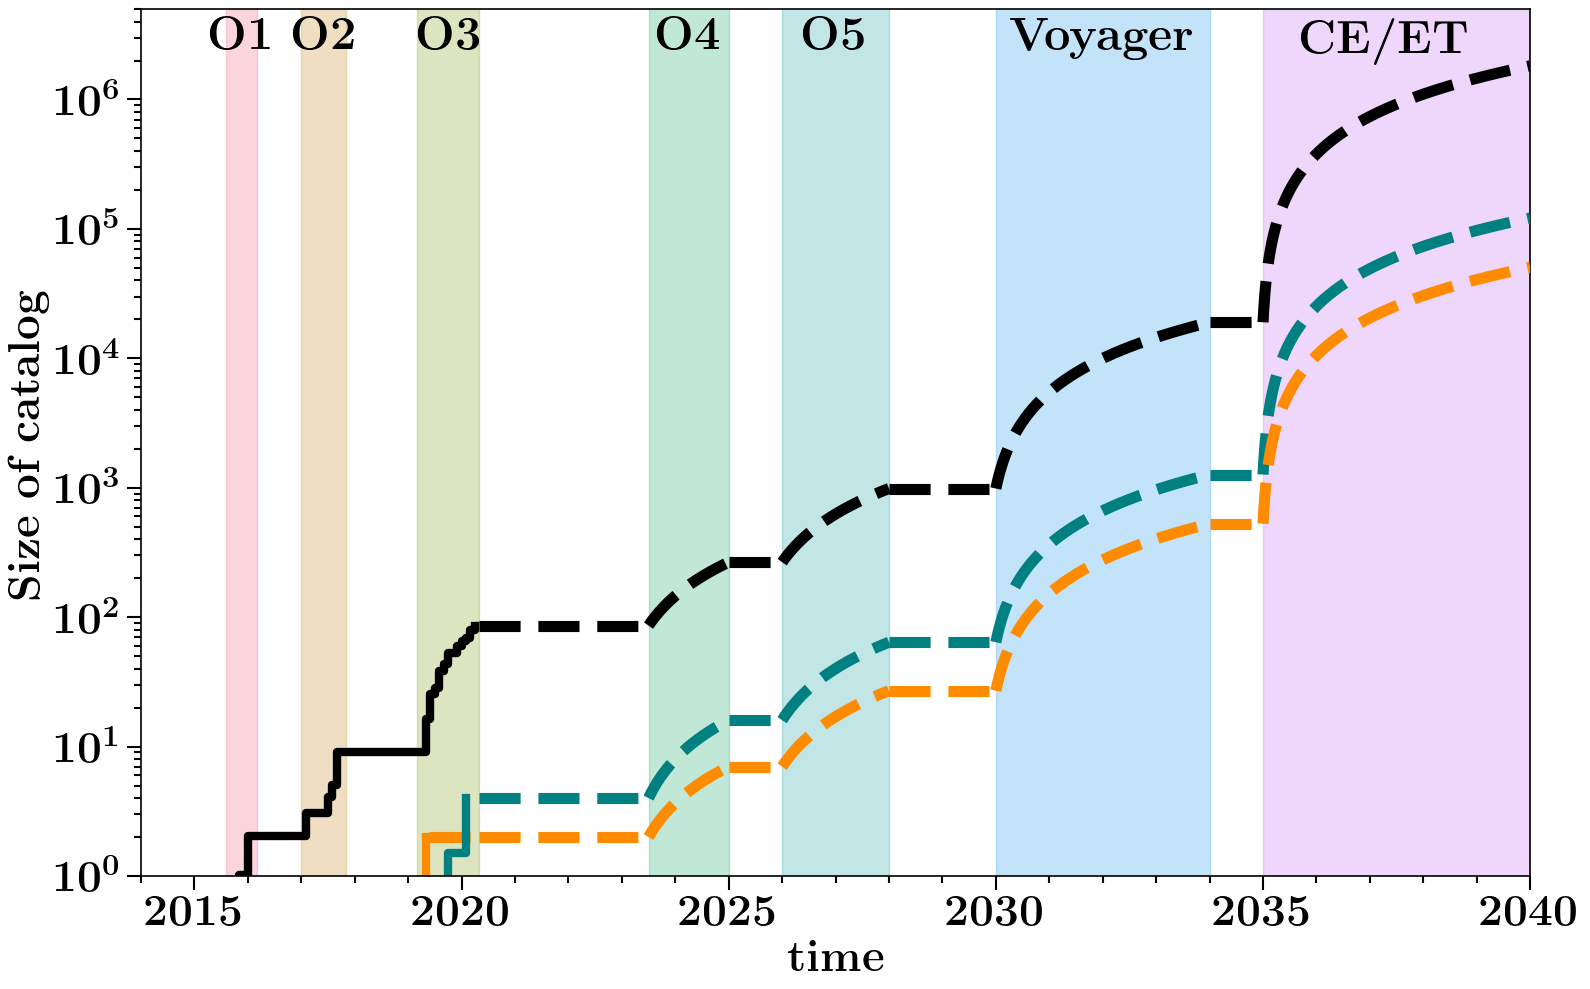

In [53]:
f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))




# data_ = np.concatenate((np.asarray(x_BBHs), O4))

O1begin = 2015+((7)/12) 
O1end = 2016 +((2)/12) 
O2begin = 2017 + ((0)/12)
O2end = 2017 + ((10)/12)
O3begin = 2019 + ((2)/12)



ET_CEbegin = 2035
ET_CEend = 2040

all_dates = [O1begin, O1end, O2begin, O2end, O3begin, O3end, O4begin, O4end, O5begin, O5end, Voy_begin, Voy_end, ET_CEbegin, ET_CEend]

DCOnumberslist = [numbers_BBH, numbers_BHNS, numbers_BNS]
DCOcolors = ['k',  'teal', 'darkorange']
detectionlist = [strptime_BBHs,  strptime_BHNSs,  strptime_BNSs]
# DCOnumberslist_up = [numbers_BBH_up, numbers_BHNS_up, numbers_BNS_up]
# DCOnumberslist_down = [numbers_BBH_down, numbers_BHNS_down, numbers_BNS_down]

for ind_DCO, DCOdetections in enumerate(detectionlist):
    cumhist(data=np.asarray(DCOdetections), c=DCOcolors[ind_DCO], lw=6)




for ind_d, line in enumerate(dates[:-1]):
    x_ = np.linspace(dates[ind_d], dates[ind_d+1], 1000)
    
    for ind_DCO, DCOlist in enumerate(DCOnumberslist):
        y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d+1], 1000)
        axe.plot(x_, y_, c=DCOcolors[ind_DCO], lw=8, ls='--', zorder=10)
        # plot error bars
#         y1_ = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d+1], 1000)
#         y2_ = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d+1], 1000)
#         axe.fill_between(x_, y1=y1_, y2=y2_, color=DCOcolors[ind_DCO], alpha=0.5)

        
    
## fix BNS disconecction due to no detections 
xx = np.linspace(2019.4, 2020.5, 10)
yy = np.linspace(numbers_BNS[0], numbers_BNS[0], 10)
axe.plot(xx, yy, c=DCOcolors[2], lw=8, ls='--', zorder=1)
        
# fill between detector runs
for ind_d, line in enumerate(all_dates[:-1]):
    if (ind_d%2)==0:
        axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.001, 0.001], y2=[1E8,1E8], alpha=0.3, color=colors[ind_d], zorder=0)
    

    

# print line today 
# x_today = np.linspace(today, today, 100)
# y_today = np.linspace(1, 5*1E6, 100)
# axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')


    
axe.set_ylim(1,5*1E6)    
axe.set_yscale('log')

axe.xaxis.set_major_locator(plt.MultipleLocator(5))
axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
axe.set_xlim(2014, 2040)

# plot the GW detector labels in the top
plot_detector_labels(axe=axe)

xlabel =  r'\textbf{time}'
ylabel = r'\textbf{Size of catalog}'
axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=fs+8)


plt.tight_layout()

plt.savefig('./GWcatalogSize.png', dpi=600, transparent=False)
plt.savefig('./GWcatalogSize.pdf', transparent=False) 



plt.show()

# only observations 

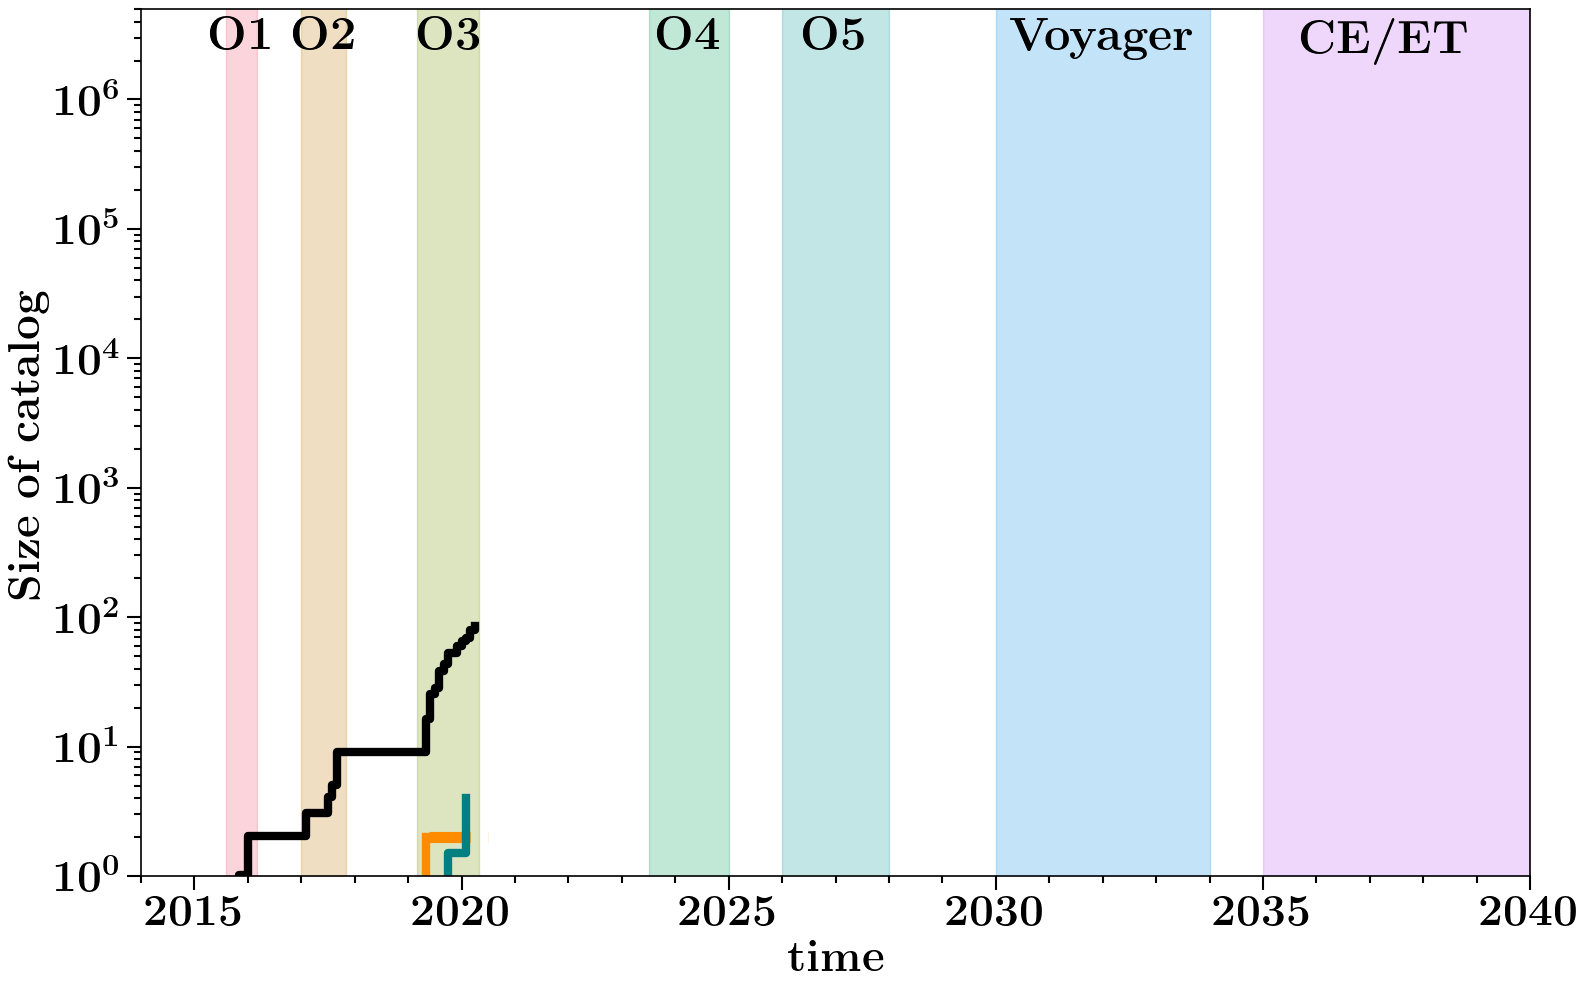

In [49]:
f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))




# data_ = np.concatenate((np.asarray(x_BBHs), O4))

O1begin = 2015+((7)/12) 
O1end = 2016 +((2)/12) 
O2begin = 2017 + ((0)/12)
O2end = 2017 + ((10)/12)
O3begin = 2019 + ((2)/12)



ET_CEbegin = 2035
ET_CEend = 2040

all_dates = [O1begin, O1end, O2begin, O2end, O3begin, O3end, O4begin, O4end, O5begin, O5end, Voy_begin, Voy_end, ET_CEbegin, ET_CEend]

DCOnumberslist = [numbers_BBH, numbers_BHNS, numbers_BNS]
DCOcolors = ['k',  'teal', 'darkorange']
detectionlist = [strptime_BBHs,  strptime_BHNSs,  strptime_BNSs]
# DCOnumberslist_up = [numbers_BBH_up, numbers_BHNS_up, numbers_BNS_up]
# DCOnumberslist_down = [numbers_BBH_down, numbers_BHNS_down, numbers_BNS_down]

for ind_DCO, DCOdetections in enumerate(detectionlist):
    cumhist(data=np.asarray(DCOdetections), c=DCOcolors[ind_DCO], lw=6)



# for ind_d, line in enumerate(dates[:-1]):
#     x_ = np.linspace(dates[ind_d], dates[ind_d+1], 1000)
    
#     for ind_DCO, DCOlist in enumerate(DCOnumberslist):
#         y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d+1], 1000)
#         axe.plot(x_, y_, c=DCOcolors[ind_DCO], lw=8, ls='--', zorder=10)
#         # plot error bars
# #         y1_ = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d+1], 1000)
# #         y2_ = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d+1], 1000)
# #         axe.fill_between(x_, y1=y1_, y2=y2_, color=DCOcolors[ind_DCO], alpha=0.5)
        
        
    
## fix BNS disconecction due to no detections 
xx = np.linspace(2019.4, 2020.5, 10)
yy = np.linspace(numbers_BNS[0], numbers_BNS[0], 10)
axe.plot(xx, yy, c=DCOcolors[2], lw=8, ls='--', zorder=1)
        
# fill between detector runs
for ind_d, line in enumerate(all_dates[:-1]):
    if (ind_d%2)==0:
        axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.001, 0.001], y2=[1E8,1E8], alpha=0.3, color=colors[ind_d], zorder=0)
    

    

# print line today 
# x_today = np.linspace(today, today, 100)
# y_today = np.linspace(1, 5*1E6, 100)
# axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')

    
    
axe.set_ylim(1,5*1E6)    
axe.set_yscale('log')

axe.xaxis.set_major_locator(plt.MultipleLocator(5))
axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
axe.set_xlim(2014, 2040)

# plot the GW detector labels in the top
plot_detector_labels(axe=axe)


xlabel =  r'\textbf{time}'
ylabel = r'\textbf{Size of catalog}'
axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=fs+8)


plt.tight_layout()

plt.savefig('./GWcatalogSize_onlyObservations.png', dpi=600, transparent=False)
# plt.savefig('./GWcatalogSize_onlyObservations.pdf', transparent=False) 



plt.show()

# make plots for movie

In [24]:
def cumhist_stop_year(data, reverse=False, mark=None, ax=None, stop_year=2024, **kwargs):
    """
    Plot a cumulative histogram of `data`, optionally with certain indices marked with an x.

    Parameters
    ----------
    data : array-like
        Data to include in the histogram
    reverse : bool, optional
        If False (default), the histogram increases with increasing `data`. If True, it decreases with increasing `data`
    mark : array-like, optional
        An array of indices to mark with an x
    ax : matplotlib.pyplot.axes, optional
        Axis on which to plot the confusion matrix. Default: current axis.
    kwargs : dict, optional
        Keyword arguments to be passed to `matplotlib.pyplot.step`

    Returns
    -------
    p : list
        The list of `matplotlib.lines.Line2D` objects returned by `matplotlib.pyplot.step`
    """
    
    if mark is None:
        mark = np.zeros(len(data), bool)
    if ax is None:
        ax = plt.gca()
    i = np.argsort(data)
    x = data[i]
    
    # only plot until given stop_year value
    mask_stop_year = data[i]< stop_year
    mark = mark[i]
    
    if np.sum(mask_stop_year)>=1:
#         x_temp = np.append([0], x[mask_stop_year])
        x = np.append(x[mask_stop_year], x[mask_stop_year][-1])
        y = np.linspace(0., x.size-1, x.size) 
        if reverse:
            y = y[::-1]
            
        ax.step(x, y, **kwargs)
    #     ax.scatter(data[i][mark][mask_stop_year], (y[:-1] + 0.5 * np.diff(y))[mark][mask_stop_year], marker='x')
        y_max = y[-1] 
    else:
        y_max=0
    
    return y_max
 




In [25]:


O1begin = 2015+((7)/12) 
O1end = 2016 +((2)/12) 
O2begin = 2017 + ((0)/12)
O2end = 2017 + ((10)/12)
O3begin = 2019 + ((2)/12)



ET_CEbegin = 2035
ET_CEend = 2040
all_dates = [O1begin, O1end, O2begin, O2end, O3begin, O3end, O4begin, O4end, O5begin, O5end, Voy_begin, Voy_end, ET_CEbegin, ET_CEend]

DCOnumberslist = [numbers_BBH, numbers_BHNS, numbers_BNS]
DCOcolors = ['k',  'teal', 'darkorange']
detectionlist = [strptime_BBHs,  strptime_BHNSs,  strptime_BNSs]




for ind_sy, stop_year in enumerate(np.linspace(2015, 2040, 200)):
    f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))


    print('at %s out of 50. Stopping plot at year %s'%(ind_sy+1, stop_year))
    y_max_all = []
    print()
    
    for ind_DCO, DCOdetections in enumerate(detectionlist):
        y_max = cumhist_stop_year(data=np.asarray(DCOdetections), ax=axe, c=DCOcolors[ind_DCO], lw=6, stop_year=stop_year)
        y_max_all.append(y_max)


    mask_stop_year = np.asarray(dates[:-1])< stop_year

    if np.sum(mask_stop_year)>=1:
        items_ind = len(np.asarray(dates[:-1])[mask_stop_year])
        for ind_d, line in enumerate(np.asarray(dates[:-1])[mask_stop_year]):
            


            for ind_DCO, DCOlist in enumerate(DCOnumberslist):
                
                
                if ind_d+1==items_ind:
                    x_ = np.linspace(dates[ind_d], stop_year, 1000)
                    dy_rate = (DCOlist[ind_d+1]-DCOlist[ind_d]) / (dates[ind_d+1]-dates[ind_d]) 
                    dy = dy_rate * (stop_year-dates[ind_d])
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d]+dy, 1000)

                else:
                    x_ = np.linspace(dates[ind_d], dates[ind_d+1], 1000)
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d+1], 1000)
                
                axe.plot(x_, y_, c=DCOcolors[ind_DCO], lw=8, ls='--', zorder=10)
                y_max_all.append(y_[-1])
                # plot error bars
        #         y1_ = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d+1], 1000)
        #         y2_ = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d+1], 1000)
        #         axe.fill_between(x_, y1=y1_, y2=y2_, color=DCOcolors[ind_DCO], alpha=0.5)



        ## fix BNS disconecction due to no detections 
        xx = np.linspace(2019.4, 2020.5, 10)
        yy = np.linspace(numbers_BNS[0], numbers_BNS[0], 10)
        axe.plot(xx, yy, c=DCOcolors[2], lw=8, ls='--', zorder=1)
        
  
    maxx_ = np.max(y_max_all)
    max_yvalue = np.max([5, maxx_])
    print(max_yvalue)

    # fill between detector runs
    for ind_d, line in enumerate(all_dates[:-1]):
        if (ind_d%2)==0:
            axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.00, 0.00], y2=[1.5*max_yvalue,1.5*max_yvalue], alpha=0.3, color=colors[ind_d], zorder=0)


    # print line today 
    # x_today = np.linspace(today, today, 100)
    # y_today = np.linspace(1, 5*1E6, 100)
    # axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')


    axe.set_ylim(0,1.1*max_yvalue)    
    if stop_year<=2035:
        axe.yaxis.set_major_formatter('{x:,.0f}')
    else:
        axe.yaxis.set_major_formatter('{x:2,.0f}')


    axe.xaxis.set_major_locator(plt.MultipleLocator(5))
    axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axe.set_xlim(2014, 2040)

    # plot the GW detector labels in the top
    plot_detector_labels(axe=axe)
    
    xlabel =  r'\textbf{time}'
    ylabel = r'\textbf{Size of catalog}'
    axe = layoutAxes(axe, nameX=xlabel, nameY=None, setMinor=False, fontsize=fs+8)


#     plt.tight_layout()

    plt.savefig('./GWcatalogMovie/GWcatalogSize_%s.png'%ind_sy, dpi=100, transparent=False)
#     plt.savefig('./GWcatalogMovie/GWcatalogSize_%s.pdf'%ind_sy, transparent=False) 
#     plt.show()
    plt.close()


# plt.show()

at 1 out of 50. Stopping plot at year 2015.0

5
at 2 out of 50. Stopping plot at year 2015.1256281407036

5
at 3 out of 50. Stopping plot at year 2015.251256281407

5
at 4 out of 50. Stopping plot at year 2015.3768844221106

5
at 5 out of 50. Stopping plot at year 2015.502512562814

5
at 6 out of 50. Stopping plot at year 2015.6281407035176

5
at 7 out of 50. Stopping plot at year 2015.7537688442212

5.0
at 8 out of 50. Stopping plot at year 2015.8793969849246

5.0
at 9 out of 50. Stopping plot at year 2016.0050251256282

5.0
at 10 out of 50. Stopping plot at year 2016.1306532663316

5.0
at 11 out of 50. Stopping plot at year 2016.2562814070352

5.0
at 12 out of 50. Stopping plot at year 2016.3819095477386

5.0
at 13 out of 50. Stopping plot at year 2016.5075376884422

5.0
at 14 out of 50. Stopping plot at year 2016.6331658291458

5.0
at 15 out of 50. Stopping plot at year 2016.7587939698492

5.0
at 16 out of 50. Stopping plot at year 2016.8844221105528

5.0
at 17 out of 50. Stopping p

at 125 out of 50. Stopping plot at year 2030.5778894472362

3586.5025125629118
at 126 out of 50. Stopping plot at year 2030.7035175879396

4151.829145728139
at 127 out of 50. Stopping plot at year 2030.8291457286432

4717.15577889439
at 128 out of 50. Stopping plot at year 2030.9547738693468

5282.482412060641
at 129 out of 50. Stopping plot at year 2031.0804020100502

5847.809045225868
at 130 out of 50. Stopping plot at year 2031.2060301507538

6413.135678392119
at 131 out of 50. Stopping plot at year 2031.3316582914572

6978.462311557347
at 132 out of 50. Stopping plot at year 2031.4572864321608

7543.7889447235975
at 133 out of 50. Stopping plot at year 2031.5829145728644

8109.115577889848
at 134 out of 50. Stopping plot at year 2031.7085427135678

8674.442211055077
at 135 out of 50. Stopping plot at year 2031.8341708542714

9239.768844221326
at 136 out of 50. Stopping plot at year 2031.9597989949748

9805.095477386554
at 137 out of 50. Stopping plot at year 2032.0854271356784

103

# ZOOM in onto BNS and BHNS 

In [26]:


for ind_sy, stop_year in enumerate(np.linspace(2035, 2040, 10)):
    f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))


    print('at %s out of 50. Stopping plot at year %s'%(ind_sy+1, stop_year))
    y_max_all = []
    print()
    # skip BBH
    for ind_DCO, DCOdetections in enumerate(detectionlist[1:]):
        y_max = cumhist_stop_year(data=np.asarray(DCOdetections), ax=axe, c=DCOcolors[ind_DCO+1], lw=6, stop_year=stop_year)
        y_max_all.append(y_max)


    mask_stop_year = np.asarray(dates[:-1])< stop_year

    if np.sum(mask_stop_year)>=1:
        items_ind = len(np.asarray(dates[:-1])[mask_stop_year])
        for ind_d, line in enumerate(np.asarray(dates[:-1])[mask_stop_year]):
            
            # skip BBH 
            for ind_DCO, DCOlist in enumerate(DCOnumberslist[1:]):
                
                
                if ind_d+1==items_ind:
                    x_ = np.linspace(dates[ind_d], stop_year, 1000)
                    dy_rate = (DCOlist[ind_d+1]-DCOlist[ind_d]) / (dates[ind_d+1]-dates[ind_d]) 
                    dy = dy_rate * (stop_year-dates[ind_d])
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d]+dy, 1000)

                else:
                    x_ = np.linspace(dates[ind_d], dates[ind_d+1], 1000)
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d+1], 1000)
                
                axe.plot(x_, y_, c=DCOcolors[ind_DCO+1], lw=8, ls='--', zorder=10)
                y_max_all.append(y_[-1])
                # plot error bars
        #         y1_ = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d+1], 1000)
        #         y2_ = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d+1], 1000)
        #         axe.fill_between(x_, y1=y1_, y2=y2_, color=DCOcolors[ind_DCO], alpha=0.5)


        ## fix BNS disconecction due to no detections 
        xx = np.linspace(2019.4, 2020.5, 10)
        yy = np.linspace(numbers_BNS[0], numbers_BNS[0], 10)
        axe.plot(xx, yy, c=DCOcolors[2], lw=8, ls='--', zorder=1)
        
        
        
#     print('max', np.max(y_max_all))   
    maxx_ = np.max(y_max_all)
    max_yvalue = np.max([5, maxx_])
    print(max_yvalue)

    # fill between detector runs
    for ind_d, line in enumerate(all_dates[:-1]):
        if (ind_d%2)==0:
            axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.00, 0.00], y2=[1.5*max_yvalue,1.5*max_yvalue], alpha=0.3, color=colors[ind_d], zorder=0)


    # print line today 
    # x_today = np.linspace(today, today, 100)
    # y_today = np.linspace(1, 5*1E6, 100)
    # axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')


    axe.set_ylim(0,1.1*max_yvalue)    
    if stop_year<=2035:
        axe.yaxis.set_major_formatter('{x:,.0f}')
    else:
        axe.yaxis.set_major_formatter('{x:2,.0f}')

        
    axe.xaxis.set_major_locator(plt.MultipleLocator(5))
    axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axe.set_xlim(2014, 2040)

    # plot the GW detector labels in the top
    plot_detector_labels(axe=axe)

    xlabel =  r'\textbf{time}'
    ylabel = r'\textbf{Size of catalog}'
    axe = layoutAxes(axe, nameX=xlabel, nameY=None, setMinor=False, fontsize=fs+8)
    

#     plt.tight_layout()

    plt.savefig('./GWcatalogMovie/GWcatalogSize_%s.png'%int(ind_sy+200), dpi=100, transparent=False)
#     plt.savefig('./GWcatalogMovie/GWcatalogSize_%s.pdf'%ind_sy, transparent=False) 
#     plt.show()
    plt.close()

at 1 out of 50. Stopping plot at year 2035.0

1264.0
at 2 out of 50. Stopping plot at year 2035.5555555555557

14597.333333335759
at 3 out of 50. Stopping plot at year 2036.111111111111

27930.66666666606
at 4 out of 50. Stopping plot at year 2036.6666666666667

41264.00000000182
at 5 out of 50. Stopping plot at year 2037.2222222222222

54597.33333333212
at 6 out of 50. Stopping plot at year 2037.7777777777778

67930.66666666788
at 7 out of 50. Stopping plot at year 2038.3333333333333

81263.99999999818
at 8 out of 50. Stopping plot at year 2038.888888888889

94597.33333333394
at 9 out of 50. Stopping plot at year 2039.4444444444443

107930.66666666424
at 10 out of 50. Stopping plot at year 2040.0

121264.0


In [ ]:


O1begin = 2015+((7)/12) 
O1end = 2016 +((2)/12) 
O2begin = 2017 + ((0)/12)
O2end = 2017 + ((10)/12)
O3begin = 2019 + ((2)/12)



ET_CEbegin = 2035
ET_CEend = 2040
all_dates = [O1begin, O1end, O2begin, O2end, O3begin, O3end, O4begin, O4end, O5begin, O5end, Voy_begin, Voy_end, ET_CEbegin, ET_CEend]

DCOnumberslist = [numbers_BBH, numbers_BHNS, numbers_BNS]
DCOcolors = ['k',  'teal', 'darkorange']
detectionlist = [strptime_BBHs,  strptime_BHNSs,  strptime_BNSs]






for ind_sy, stop_year in enumerate(np.linspace(2015, 2040, 200)):
    f, axe= plt.subplots(ncols=1,nrows=1,figsize=(16,10))


    print('at %s out of 50. Stopping plot at year %s'%(ind_sy+1, stop_year))
    y_max_all = []
    print()
    
    for ind_DCO, DCOdetections in enumerate(detectionlist):
        y_max = cumhist_stop_year(data=np.asarray(DCOdetections), ax=axe, c=DCOcolors[ind_DCO], lw=6, stop_year=stop_year)
        y_max_all.append(y_max)


    mask_stop_year = np.asarray(dates[:-1])< stop_year

    if np.sum(mask_stop_year)>=1:
        items_ind = len(np.asarray(dates[:-1])[mask_stop_year])
        for ind_d, line in enumerate(np.asarray(dates[:-1])[mask_stop_year]):
            


            for ind_DCO, DCOlist in enumerate(DCOnumberslist):
                
                
                if ind_d+1==items_ind:
                    x_ = np.linspace(dates[ind_d], stop_year, 1000)
                    dy_rate = (DCOlist[ind_d+1]-DCOlist[ind_d]) / (dates[ind_d+1]-dates[ind_d]) 
                    dy = dy_rate * (stop_year-dates[ind_d])
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d]+dy, 1000)

                else:
                    x_ = np.linspace(dates[ind_d], dates[ind_d+1], 1000)
                    y_ = np.linspace(DCOlist[ind_d], DCOlist[ind_d+1], 1000)
                
                axe.plot(x_, y_, c=DCOcolors[ind_DCO], lw=8, ls='--', zorder=10)
                y_max_all.append(y_[-1])
                # plot error bars
        #         y1_ = np.linspace(DCOnumberslist_down[ind_DCO][ind_d], DCOnumberslist_down[ind_DCO][ind_d+1], 1000)
        #         y2_ = np.linspace(DCOnumberslist_up[ind_DCO][ind_d], DCOnumberslist_up[ind_DCO][ind_d+1], 1000)
        #         axe.fill_between(x_, y1=y1_, y2=y2_, color=DCOcolors[ind_DCO], alpha=0.5)



        ## fix BNS disconecction due to no detections 
        xx = np.linspace(2019.4, 2020.5, 10)
        yy = np.linspace(numbers_BNS[0], numbers_BNS[0], 10)
        axe.plot(xx, yy, c=DCOcolors[2], lw=8, ls='--', zorder=1)
        
        
        
#     print('max', np.max(y_max_all))   
    maxx_ = np.max(y_max_all)
    max_yvalue = np.max([5, maxx_])
    print(max_yvalue)

    # fill between detector runs
    for ind_d, line in enumerate(all_dates[:-1]):
        if (ind_d%2)==0:
            axe.fill_between(x=[all_dates[ind_d], all_dates[ind_d+1]], y1=[0.000001, 0.000001], y2=[1E8,1E8], alpha=0.3, color=colors[ind_d], zorder=0)




    # print line today 
    # x_today = np.linspace(today, today, 100)
    # y_today = np.linspace(1, 5*1E6, 100)
    # axe.plot(x_today, y_today, lw=2, ls='-.', color='gray')



    axe.set_ylim(1,1.1E8)    
    axe.set_yscale('log')

#     axe.yaxis.set_major_formatter('{x:9<1.1f}')
    axe.xaxis.set_major_locator(plt.MultipleLocator(5))
    axe.xaxis.set_minor_locator(plt.MultipleLocator(1))
    axe.set_xlim(2014, 2040)


    xlabel =  r'\textbf{time}'
    ylabel = r'\textbf{Size of catalog}'

    axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=fs+8)


    plt.tight_layout()

    plt.savefig('./GWcatalogMovie/GWcatalogSize_log_%s.png'%ind_sy, dpi=100, transparent=False)
#     plt.savefig('./GWcatalogMovie/GWcatalogSize_log_%s.pdf'%ind_sy, transparent=False) 
    plt.close()


# plt.show()